In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

kmeans = KMeans(n_clusters=5, random_state=42)

y_pred = kmeans.fit_predict(X)

/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [2]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [3]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [4]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [5]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
pred_new = kmeans.predict(X_new)
pred_new

array([1, 1, 2, 2], dtype=int32)

In [6]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

In [7]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit_predict(X)


array([2, 1, 4, ..., 0, 4, 1], dtype=int32)

In [8]:
kmeans.inertia_

211.5985372581684

In [9]:
from sklearn.cluster import MiniBatchKMeans


minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=5, random_state=42)

In [10]:
minibatch_kmeans.inertia_

211.65239850433204

In [11]:
kmeans3 = KMeans(n_clusters=3, random_state=43)
kmeans8 = KMeans(n_clusters=8, random_state=44)

for mean in (kmeans3, kmeans, kmeans8):
    mean.fit(X)
    print(mean.inertia_)
    
# Inertia is not a good performance measure since when we increase k it will always get smaller
# With bigger k each instance will tend to be closer to its centroid

653.2167190021553
211.5985372581684
118.42690458917343


/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

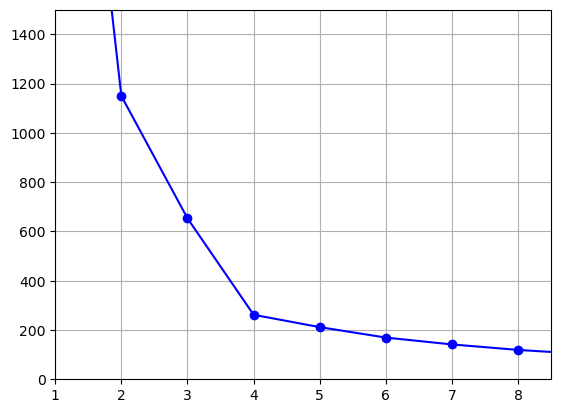

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt



plt.plot(range(1, 10), inertias, "bo-")
plt.axis([1, 8.5, 0, 1500])
plt.grid()
plt.show()








/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

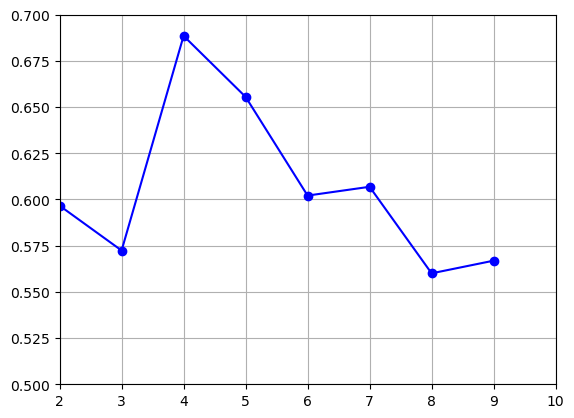

In [14]:
from sklearn.metrics import silhouette_score

silhouettes = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))


# kmeans = KMeans(n_clusters=5, random_state=31)
# kmeans.fit(X)
    
# silhouette_score(X, kmeans.labels_)
    
plt.plot(range(2, 10), silhouettes, "bo-")
plt.axis([2, 10, 0.5, 0.7])
plt.grid()
plt.show()

In [15]:
import PIL

PATH = "/Users/tuncer/Documents/Machine Learning/Datasets/images/ladybug.png"

image = np.asarray(PIL.Image.open(PATH))
image.shape

(533, 800, 3)

In [16]:
X = image.reshape(-1, 3)

/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

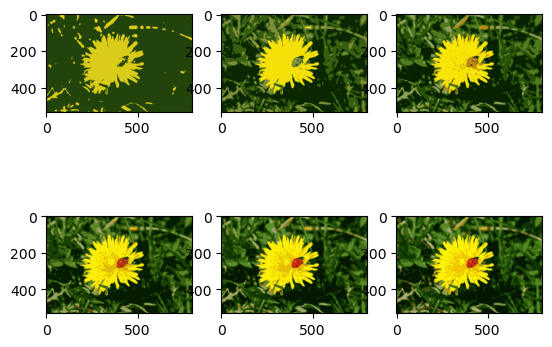

In [17]:

for n in [2, 4, 6, 8, 10, 12]:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    plt.subplot(2, 3, int(n/2))
    plt.imshow(segmented_img / 255)
    

In [18]:
# Semi-Supervised Learning


from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# we pretend we have 50 labeled instance
# to get a base performance we will train a LogicticRegression model

n_labeled = 50
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train[ :n_labeled], y_train[ :n_labeled])

log_reg.score(X_test, y_test)




0.8611111111111112

In [19]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]




/Users/tuncer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


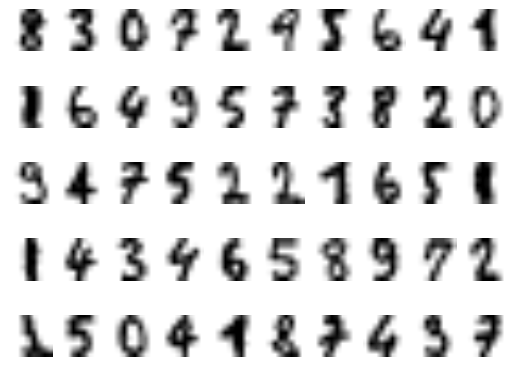

In [20]:
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')
plt.show()

In [21]:
y_representative_digits = np.array([
    6, 9, 2, 5, 8, 7, 4, 6, 0, 3,
    7, 5, 1, 1, 3, 9, 2, 9, 9, 7,
    8, 6, 3, 7, 4, 2, 1, 0, 7, 2,
    5, 8, 6, 3, 2, 4, 1, 8, 0, 7,
    5, 4, 6, 4, 5, 9, 8, 8, 0, 9,
    
])

# labeled data with hand

In [22]:
log_reg = LogisticRegression(max_iter=10_000, random_state=43)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.08333333333333333

In [23]:
# Label Propagation


y_train_propagated = np.empty(len(X_train), dtype = np.int64)

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]



In [24]:
log_reg = LogisticRegression(max_iter=10_000, random_state=44)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.044444444444444446

In [25]:
# Trying to eliminate outliers by creating a set without the farthest 1% 

percentile = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated  = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
    
    
    


In [26]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.044444444444444446

In [27]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9777777777777777

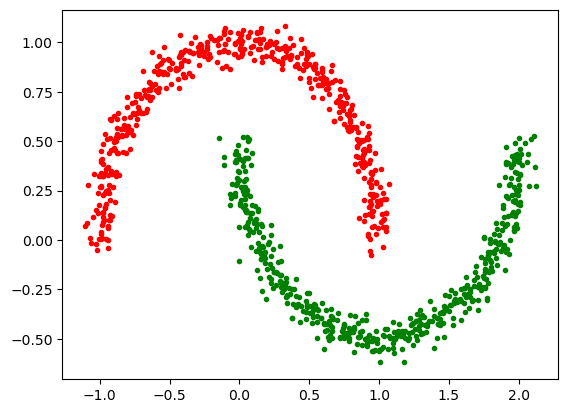

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=1000, noise = 0.05, random_state=42)

dbscan = DBSCAN(eps = 0.5, min_samples=5)


plt.plot(X[ : , 0][y == 0], X[ : , 1][y == 0], "r.")
plt.plot(X[ : , 0][y == 1], X[ : , 1][y == 1], "g.")
plt.show()


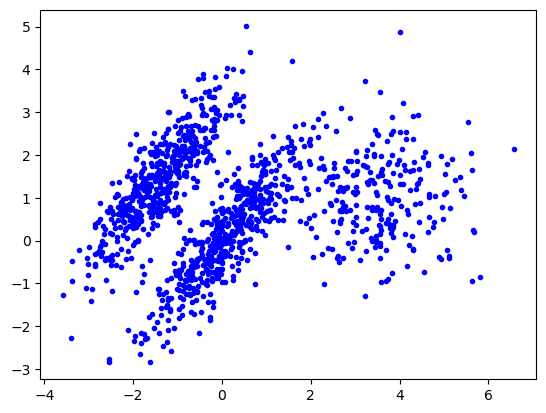

In [29]:
# Gaussian Mixtures

from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

gm = GaussianMixture(n_components=3, n_init=10)

gm.fit(X)
#plt.plot(X1[ : , 0], X1[ : , 1], "r.")

#plt.plot(X2[ : , 0], X2[ : , 1], "g.")

plt.plot(X[ : , 0], X[ : , 1], "b.")



In [30]:
gm.weights_

array([0.40005972, 0.39032584, 0.20961444])

In [31]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]]])

In [32]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088]])

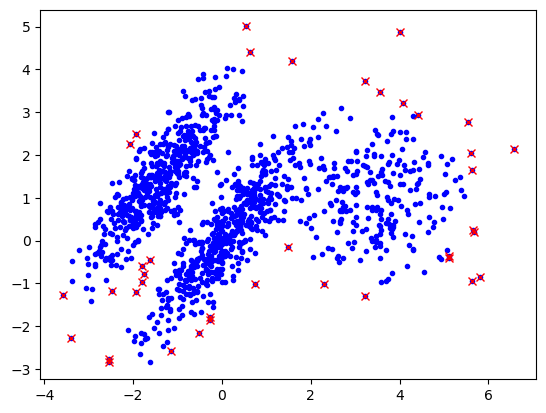

In [36]:
densities = gm.score_samples(X)
density_treshold = np.percentile(densities, 3)
anomalies = X[densities < density_treshold]

plt.plot(X[ : , 0], X[ : , 1], "b.")
plt.plot(anomalies[ : , 0], anomalies[ : , 1], "rx")

In [38]:
gm.bic(X)

8189.733705221636

In [39]:
gm.aic(X)

8102.508425106598

In [40]:
bic = []
aic = []

for n in [2, 3, 4, 5, 6, 7, 8]:
    gm = GaussianMixture(n_components=n, n_init = 10)
    gm.fit(X)
    print(n, "BIC", gm.bic(X), "- AIC", gm.aic(X))
    
    

    
    

2 BIC 8971.197133122107 - AIC 8914.757245988847
3 BIC 8189.733705221636 - AIC 8102.508425106598
4 BIC 8229.595643711533 - AIC 8111.584970614716
5 BIC 8273.866692737673 - AIC 8125.070626659079
6 BIC 8311.446531268297 - AIC 8131.865072207926
7 BIC 8352.01809535403 - AIC 8141.651243311879
8 BIC 8391.038436209936 - AIC 8149.886191186007


In [45]:
from sklearn.mixture import BayesianGaussianMixture

# for n in [2, 3, 4, 5, 6, 7, 8]:
#     bgm = BayesianGaussianMixture(n_components=n, n_init=10)
#     bgm.fit(X)
#     print(n, "BIC", bgm.bic(X), "- AIC", bgm.aic(X))


bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])